In [1]:
import numpy as np
from matplotlib import pyplot as plt
import py_gauge_mc
import scipy.signal

In [2]:
def autocorr_for_graph(L=8,inv_k=0.1,winding=0):
    inv_k = 0.1
    vs = inv_k * np.arange(64)**2
    vs = np.array([vs], dtype=np.float32)
    graph = py_gauge_mc.GPUGaugeTheory((8,8,8,8),vs)

    state = np.zeros((8,8,8,8,6),dtype=np.int32)
    state[:,:,0,0,0] = winding
    graph.write_state(0,state)
    assert graph.get_violations() == []

    graph.run_local_update(1000)

    all_data = []
    for i in range(1000):
        graph.run_local_update()
        all_data.append(graph.get_graph_state())
    all_data = np.array(all_data)
    flat_data = all_data.reshape((all_data.shape[0], -1))
    results = autocorr(flat_data)
    return results
    
def autocorr(x):
    results = None
    for i in range(x.shape[-1]):
        result = np.correlate(x[:,i], x[:,i], mode='full')
        if results is None:
            results = result[result.size//2:]
        else:
            results = results + result[result.size//2:]
    return results / x.shape[-1]

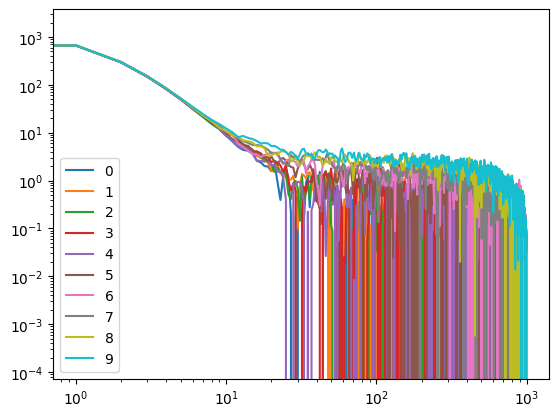

In [3]:
for i in range(10):
    results = autocorr_for_graph(winding=i)
    plt.plot(results, label=f"{i}")
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.show()

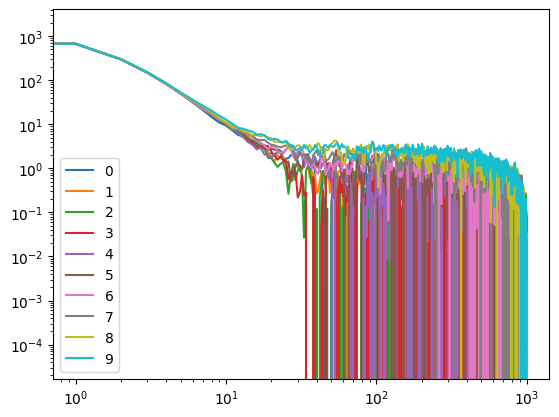

In [4]:
for i in range(10):
    results = autocorr_for_graph(inv_k=1.0,winding=i)
    plt.plot(results, label=f"{i}")
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.show()